# Problem Statement 1

### Dependencies: If anaconda is getting used to execute these cells the please install imblearn and delayed library to successfully execute all the cells 
### command to install in notebook: 
### !pip install imblearn
### !pip install delayed

### Importing all required libraries

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, ADASYN
from sklearn.model_selection import GridSearchCV

### read data file with all default columns

In [2]:
train_df=pd.read_csv('dataset.csv',index_col='customerID')

In [3]:
#informatin about all columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   StreamingService  7043 non-null   object 
 9   Contract          7043 non-null   object 
 10  PaperlessBilling  7043 non-null   object 
 11  PaymentMethod     7043 non-null   object 
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   object 
 14  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 880.4+ KB


### Apart from tenure,MonthlyCharges,TotalCharges all are categorical columns

In [4]:
#Chcek for empty strings in TotalCharges column
train_df[train_df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,One year,Yes,Mailed check,19.70,,No


In [5]:
#impute total charges where empty string is present, we are imputing with monthly charges because 
#these are the customers who are new to this service and empty value is for first month
train_df['TotalCharges'] = np.where(train_df['TotalCharges'] == ' ', train_df['MonthlyCharges'], train_df['TotalCharges'])

In [6]:
#convert all categorical to numerical using labelencoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in same column
train_df['gender'] = labelencoder.fit_transform(train_df['gender'])
train_df['SeniorCitizen'] = labelencoder.fit_transform(train_df['SeniorCitizen'])
train_df['Partner'] = labelencoder.fit_transform(train_df['Partner'])
train_df['Dependents'] = labelencoder.fit_transform(train_df['Dependents'])
train_df['PhoneService'] = labelencoder.fit_transform(train_df['PhoneService'])
train_df['MultipleLines'] = labelencoder.fit_transform(train_df['MultipleLines'])
train_df['InternetService'] = labelencoder.fit_transform(train_df['InternetService'])
train_df['StreamingService'] = labelencoder.fit_transform(train_df['StreamingService'])
train_df['Contract'] = labelencoder.fit_transform(train_df['Contract'])
train_df['PaperlessBilling'] = labelencoder.fit_transform(train_df['PaperlessBilling'])
train_df['PaymentMethod'] = labelencoder.fit_transform(train_df['PaymentMethod'])
train_df['Churn'] = labelencoder.fit_transform(train_df['Churn'])
train_df['TotalCharges']=train_df['TotalCharges'].astype('float64')

In [7]:
#One hot encode fo categorical columns
cat_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                                                   'InternetService','StreamingService','Contract','PaperlessBilling','PaymentMethod',
                                                  ]
train_df = pd.get_dummies(train_df, columns = cat_cols)

In [8]:
#check for final time after preprocessing
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tenure              7043 non-null   int64  
 1   MonthlyCharges      7043 non-null   float64
 2   TotalCharges        7043 non-null   float64
 3   Churn               7043 non-null   int32  
 4   gender_0            7043 non-null   uint8  
 5   gender_1            7043 non-null   uint8  
 6   SeniorCitizen_0     7043 non-null   uint8  
 7   SeniorCitizen_1     7043 non-null   uint8  
 8   Partner_0           7043 non-null   uint8  
 9   Partner_1           7043 non-null   uint8  
 10  Dependents_0        7043 non-null   uint8  
 11  Dependents_1        7043 non-null   uint8  
 12  PhoneService_0      7043 non-null   uint8  
 13  PhoneService_1      7043 non-null   uint8  
 14  MultipleLines_0     7043 non-null   uint8  
 15  MultipleLines_1     7043 non-null   uint8  
 

In [9]:
#Separate independent features and dependent features
X=train_df.loc[:, train_df.columns != 'Churn']
y=train_df['Churn'].ravel()

In [10]:
#split the traing data in training and validation set,set stratify so 
#that test set should contain value for churn and "not churn" both
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5634, 31) (5634,)
(1409, 31) (1409,)


In [11]:
#Scale the training data and transform test data on the same
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [12]:
#Methode for creating logistic regression and checking metrics
def fit_logistic_regression_classifier(X_training_set, y_training_set):
    logreg = LogisticRegression(random_state=88)
    model = logreg.fit(X_training_set, y_training_set)
    y_pred = model.predict(X_test_scaled)
    print('accuracy = ',model.score(X_test_scaled, y_test).round(2),
          'precision = ',precision_score(y_test, y_pred).round(2), 
          'recall = ',recall_score(y_test, y_pred).round(2), 
          'f1_score = ',f1_score(y_test, y_pred).round(2),
          'roc_auc_score = ',roc_auc_score(y_test, y_pred)
         )
    return(y_pred)

In [13]:
#method to create confusion matix and plot the same
def make_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    print(cm)
    # Normalize values
    cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > 50 else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def plot_confusion_matrix(y_test_set, y_pred):
    class_names = ['No Churn','Churn']
    cnf_matrix = confusion_matrix(y_test_set, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    make_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix with normalization');

accuracy =  0.8 precision =  0.65 recall =  0.56 f1_score =  0.6 roc_auc_score =  0.7243393009377664
[[921 114]
 [165 209]]


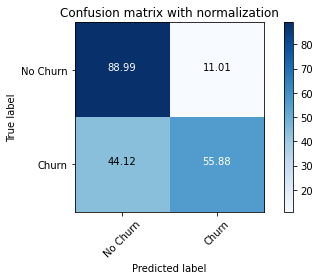

In [14]:
#Get prediction on validation set and plot metrics to check performance
y_pred = fit_logistic_regression_classifier(X_train_scaled, y_train)
plot_confusion_matrix(y_test, y_pred)

## Random Oversampling

! pip install imblearn
! pip install delayed

In [15]:
#Balancing dataset using RandomOverSampler(random over sampling)
ros = RandomOverSampler(random_state=88)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
yvals, counts = np.unique(y_test, return_counts=True)
yvals_ros, counts_ros = np.unique(y_resampled, return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)),'\n',
      'Classes in rebalanced test set:',dict(zip(yvals_ros, counts_ros)))

Classes in test set: {0: 1035, 1: 374} 
 Classes in rebalanced test set: {0: 4139, 1: 4139}


accuracy =  0.74 precision =  0.51 recall =  0.81 f1_score =  0.62 roc_auc_score =  0.7621974217882147
[[742 293]
 [ 72 302]]


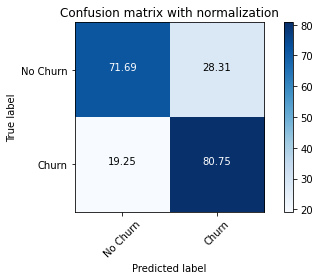

In [16]:
#Get prediction on oversampled and check metrics
y_pred_ros = fit_logistic_regression_classifier(X_resampled, y_resampled)
plot_confusion_matrix(y_test, y_pred_ros)

In [17]:
#Check using smote method and adasyn method
smote_nc = SMOTENC(categorical_features=list(np.arange(3,31)) ,random_state=88)
X_smoted, y_smoted = smote_nc.fit_resample(X_train_scaled, y_train)
adasyn = ADASYN(random_state=88)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
yvals, counts = np.unique(y_test, return_counts=True)
yvals_smt, counts_smt = np.unique(y_smoted, return_counts=True)
yvals_ads, counts_ads = np.unique(y_adasyn, return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)),'\n',
      'Classes in rebalanced test set with SMOTENC:',dict(zip(yvals_smt, counts_smt)),'\n',
      'Classes in rebalanced test set with ADASYN:',dict(zip(yvals_ads, counts_ads)))

Classes in test set: {0: 1035, 1: 374} 
 Classes in rebalanced test set with SMOTENC: {0: 4139, 1: 4139} 
 Classes in rebalanced test set with ADASYN: {0: 4139, 1: 4029}


accuracy =  0.76 precision =  0.53 recall =  0.79 f1_score =  0.63 roc_auc_score =  0.7678149784287893
[[773 262]
 [ 79 295]]


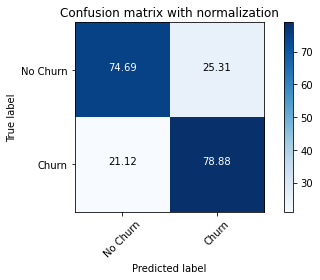

In [18]:
#check performance for smote
y_pred_smt = fit_logistic_regression_classifier(X_smoted, y_smoted)
plot_confusion_matrix(y_test, y_pred_smt)

accuracy =  0.73 precision =  0.5 recall =  0.84 f1_score =  0.63 roc_auc_score =  0.7676121832132062
[[720 315]
 [ 60 314]]


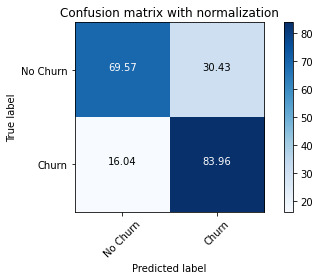

In [19]:
#check performance for adasyn
y_pred_smt = fit_logistic_regression_classifier(X_adasyn, y_adasyn)
plot_confusion_matrix(y_test, y_pred_smt)

## Since we got best recall value for adasyn we will tune hyperparameter using oversampled training set of that method only

In [20]:
#Tune the hyper-parameters using gridsearch for logistic regression
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg = LogisticRegression(random_state=88)
logreg_cv = GridSearchCV(logreg,grid,cv=5,scoring='recall')
logreg_cv.fit(X_adasyn, y_adasyn)
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}


C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\abc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

accuracy =  0.84 precision =  0.5 recall =  0.84 f1_score =  0.63 roc_auc_score =  0.7243393009377664
[[720 315]
 [ 60 314]]


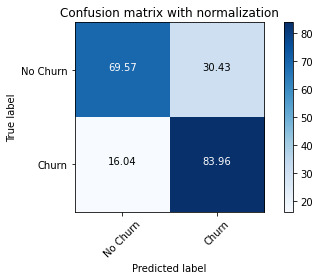

In [21]:
#Get prediction for tuned model and check metrics
y_pred_cv = logreg_cv.predict(X_test_scaled)
print('accuracy = ',logreg_cv.score(X_test_scaled, y_test).round(2),
        'precision = ',precision_score(y_test, y_pred_cv).round(2), 
        'recall = ',recall_score(y_test, y_pred_cv).round(2), 
        'f1_score = ',f1_score(y_test, y_pred_cv).round(2),
        'roc_auc_score = ',roc_auc_score(y_test, y_pred)
        )
plot_confusion_matrix(y_test, y_pred_cv)

## So finally we got best recall value of 0.84 with accuracy of 0.84 and f1_score value of 0.64

## logreg_cv is our final model which can be exported and used for prediction, test data should be preprocessed in similar fasion as train data has been processed

###                                                -----------------------------------------------------THE END -------------------------------------